In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib
%matplotlib inline  
matplotlib.get_backend()


'module://ipykernel.pylab.backend_inline'

In [2]:
import nltk
from nltk.corpus import stopwords
import random
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.utils import shuffle

In [3]:
metadata = pd.read_csv(r"C:\Users\Shreya Ananya\Documents\Information.csv",encoding='latin1')

In [4]:
metadata.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)


<b>Data Columns</b>

In [5]:
metadata.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
data = metadata.loc[:, metadata.columns.intersection([ '_unit_id', 'gender', 'gender:confidence', 'description', 'fav_number', 'retweet_count', 'text', 'tweet_count'])]

In [12]:
data.head(2)

,_unit_id,gender,gender:confidence,description,fav_number,retweet_count,text,tweet_count
0,815719226,male,1.0,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964
1,815719227,male,1.0,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471


<h1><b>Data Cleaning Steps</b></h1>

In [13]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

data['Tweets'] = [cleaning(s) for s in data['text']]
data['Description'] = [cleaning(s) for s in data['description']]

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
data['Tweets'] = data['Tweets'].str.lower().str.split()
data['Tweets'] = data['Tweets'].apply(lambda x : [item for item in x if item not in stop])

In [14]:
data.head(2)

,_unit_id,gender,gender:confidence,description,fav_number,retweet_count,text,tweet_count,Tweets,Description
0,815719226,male,1.0,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm
1,815719227,male,1.0,I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ûïit, felt, like, friends, living, story, û, ...",i m the author of novels filled with family dr...


<b>Tweets Gender Counts</b>

In [15]:
data.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [16]:
Male = data[data['gender'] == 'male']
Female = data[data['gender'] == 'female']
Brand = data[data['gender'] == 'brand']
Male_Words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Female_Words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20]
Brand_words = pd.Series(' '.join(Brand['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10]

<b>Word Frequency Count Based On Gender</b>

In [18]:
Female_Words

'ù',         1025
'like',       403
'get',        314
'one',        270
'day',        253
'ù']          248
'love',       240
'go',         239
'û',          235
'time',       201
'amp',        196
'people',     194
'âù',         189
'know',       174
'last',       171
'new',        170
'got',        157
'ü',          155
'back',       155
'make',       154
dtype: int64

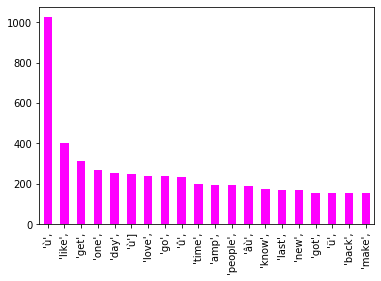

In [19]:
Female_Words.plot(kind='bar',stacked=True, colormap='spring')

In [20]:
Male_Words

'ù',         365
'like',      322
'get',       309
'û',         235
'one',       209
'new',       192
'time',      191
'go',        185
'love',      179
'people',    155
'day',       153
'see',       151
'good',      150
'amp',       148
'know',      148
'would',     139
'back',      138
'think',     133
'make',      132
'got',       131
dtype: int64

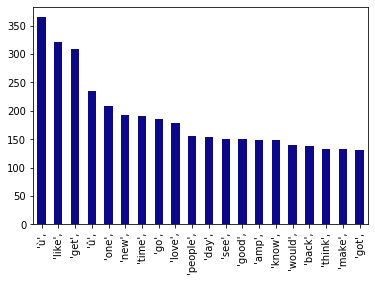

In [21]:
Male_Words.plot(kind='bar',stacked=True, colormap='plasma')

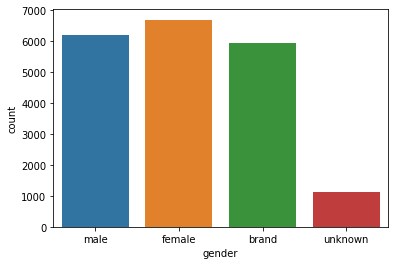

In [22]:
import seaborn as sb
sb.countplot(x='gender',data=data)

<b>Which gender makes more typos</b>

In [23]:
Mtypos=Male['Tweets'].to_list()

In [24]:
Mtypos

[['robbie',
  'e',
  'responds',
  'critics',
  'win',
  'eddie',
  'edwards',
  'worldtitleseries',
  'nsybbmvjkz'],
 ['ûïit',
  'felt',
  'like',
  'friends',
  'living',
  'story',
  'û',
  'arngeyhno',
  'retired',
  'ian',
  'cizcanpqfz'],
 ['absolutely',
  'adore',
  'louis',
  'starts',
  'songs',
  'hits',
  'hard',
  'feels',
  'good'],
 ['hi',
  'jordanspieth',
  'looking',
  'url',
  'use',
  'ifttt',
  'typically',
  'see',
  'advanced',
  'user',
  'pgatour',
  'houpel'],
 ['gala',
  'bingo',
  'clubs',
  'bought',
  'å',
  'uk',
  'largest',
  'high',
  'street',
  'bingo',
  'operator',
  'gala',
  'taken',
  'û',
  'hzeeykjud'],
 ['olyazzy',
  'ditto',
  'still',
  'learning',
  'favourites',
  'retweet',
  'stuff',
  'least',
  'sucks',
  'less',
  'facebook',
  'haha',
  'p'],
 ['caribbros', 'jstsaleem', 'understand', 'get', 'server', 'get'],
 ['yall',
  'lmfaoo',
  'right',
  'chorus',
  'came',
  'tear',
  'rolled',
  'face',
  'ayuqdptvse'],
 ['james',
  'bond',
  

In [25]:
maleTypos=Mtypos[0]
for i in range(1,len(Mtypos)):
    for j in Mtypos[i]:
        maleTypos.append(j)

In [26]:
maleTypos

['robbie',
 'e',
 'responds',
 'critics',
 'win',
 'eddie',
 'edwards',
 'worldtitleseries',
 'nsybbmvjkz',
 'ûïit',
 'felt',
 'like',
 'friends',
 'living',
 'story',
 'û',
 'arngeyhno',
 'retired',
 'ian',
 'cizcanpqfz',
 'absolutely',
 'adore',
 'louis',
 'starts',
 'songs',
 'hits',
 'hard',
 'feels',
 'good',
 'hi',
 'jordanspieth',
 'looking',
 'url',
 'use',
 'ifttt',
 'typically',
 'see',
 'advanced',
 'user',
 'pgatour',
 'houpel',
 'gala',
 'bingo',
 'clubs',
 'bought',
 'å',
 'uk',
 'largest',
 'high',
 'street',
 'bingo',
 'operator',
 'gala',
 'taken',
 'û',
 'hzeeykjud',
 'olyazzy',
 'ditto',
 'still',
 'learning',
 'favourites',
 'retweet',
 'stuff',
 'least',
 'sucks',
 'less',
 'facebook',
 'haha',
 'p',
 'caribbros',
 'jstsaleem',
 'understand',
 'get',
 'server',
 'get',
 'yall',
 'lmfaoo',
 'right',
 'chorus',
 'came',
 'tear',
 'rolled',
 'face',
 'ayuqdptvse',
 'james',
 'bond',
 'premier',
 'night',
 'everymancinema',
 'oxted',
 'sidiedey',
 'let',
 'hope',
 'liv

In [27]:
Ftypos=Female['Tweets'].to_list()

In [28]:
Ftypos

[['watching',
  'neighbours',
  'sky',
  'catching',
  'neighbs',
  'xxx',
  'ù',
  'äù',
  'äù',
  'äùôîù',
  'èùô',
  'ù',
  'è',
  'xxx'],
 ['ive',
  'seen',
  'people',
  'train',
  'lamps',
  'chairs',
  'tvs',
  'etc',
  'wzfpvmi'],
 ['aphmau',
  'pic',
  'defines',
  'mcd',
  'fangirls',
  'fanboys',
  'mcd',
  'shippers',
  'xd'],
 ['evielady',
  'lovely',
  'tree',
  'year',
  'never',
  'seen',
  'gorgeous',
  'autumn',
  'lour'],
 ['put', 'ass', 'line', 'repay'],
 ['even', 'need', 'sound', 'effects', 'diviners', 'tonight'],
 ['erogwtftyo', 'glow', 'satisfaction', 'glow', 'rdymcvpkx'],
 ['giannaaa',
  'lmao',
  'ù',
  'âù',
  'â',
  'dude',
  'hella',
  'scared',
  'next',
  'episode',
  'bc',
  'ending',
  'yesterday'],
 ['craftyear', 'isabelpascual', 'thank', 'retweets'],
 ['girls',
  'went',
  'sleep',
  'guys',
  'sat',
  'floor',
  'watched',
  'usù',
  'âù',
  'â'],
 ['chrisaofficial', 'right', 'sideù', 'â', 'ïîù', 'ü', 'xxx'],
 ['sydniejr',
  'except',
  'hallmark',
  

In [29]:
femaleTypos=Ftypos[0]
for i in range(1,len(Ftypos)):
    for j in Ftypos[i]:
        femaleTypos.append(j)

In [30]:
femaleTypos

['watching',
 'neighbours',
 'sky',
 'catching',
 'neighbs',
 'xxx',
 'ù',
 'äù',
 'äù',
 'äùôîù',
 'èùô',
 'ù',
 'è',
 'xxx',
 'ive',
 'seen',
 'people',
 'train',
 'lamps',
 'chairs',
 'tvs',
 'etc',
 'wzfpvmi',
 'aphmau',
 'pic',
 'defines',
 'mcd',
 'fangirls',
 'fanboys',
 'mcd',
 'shippers',
 'xd',
 'evielady',
 'lovely',
 'tree',
 'year',
 'never',
 'seen',
 'gorgeous',
 'autumn',
 'lour',
 'put',
 'ass',
 'line',
 'repay',
 'even',
 'need',
 'sound',
 'effects',
 'diviners',
 'tonight',
 'erogwtftyo',
 'glow',
 'satisfaction',
 'glow',
 'rdymcvpkx',
 'giannaaa',
 'lmao',
 'ù',
 'âù',
 'â',
 'dude',
 'hella',
 'scared',
 'next',
 'episode',
 'bc',
 'ending',
 'yesterday',
 'craftyear',
 'isabelpascual',
 'thank',
 'retweets',
 'girls',
 'went',
 'sleep',
 'guys',
 'sat',
 'floor',
 'watched',
 'usù',
 'âù',
 'â',
 'chrisaofficial',
 'right',
 'sideù',
 'â',
 'ïîù',
 'ü',
 'xxx',
 'sydniejr',
 'except',
 'hallmark',
 'movies',
 'start',
 'get',
 'anything',
 'done',
 'ù',
 'ù',
 

In [31]:
from nltk.corpus import brown
word_list = brown.words()
word_set = set(word_list)

In [32]:
Mcount=[]
for i in maleTypos:
    Mcount.append(i in word_set)

In [33]:
Mcount

[False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 

In [34]:
Fcount=[]
for i in femaleTypos:
    Fcount.append(i in word_set)

In [35]:
Fcount

[True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 Fa

In [36]:
MaleTypos = pd.DataFrame (Mcount,columns=['Male_Typos'])
FemaleTypos = pd.DataFrame (Fcount,columns=['Female_Typos'])

In [37]:
FemaleTypos.Female_Typos.value_counts()

True     40089
False    20040
Name: Female_Typos, dtype: int64

In [38]:
MaleTypos.Male_Typos.value_counts()

True     38561
False    19059
Name: Male_Typos, dtype: int64

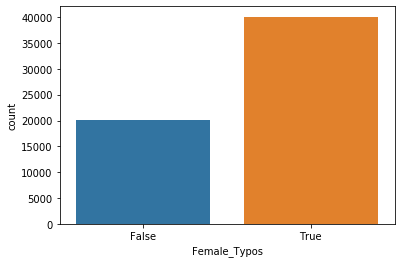

In [39]:
sb.countplot(x='Female_Typos',data=FemaleTypos)


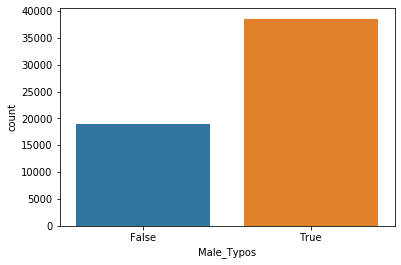

In [40]:
sb.countplot(x='Male_Typos',data=MaleTypos)

In [62]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [63]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('Hi there, I am loving this, like with a lot of love'))
print(tokenizer_porter('Hi there, I am loving this, like with a lot of love'))

['Hi', 'there,', 'I', 'am', 'loving', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']
['Hi', 'there,', 'I', 'am', 'love', 'this,', 'like', 'with', 'a', 'lot', 'of', 'love']


In [64]:
drop_items_idx = data[data['gender'] == 'unknown'].index

data.drop (index = drop_items_idx, inplace = True)

data['gender'].value_counts()

b'female'    5367
b'male'      4653
b'brand'     3784
b'nan'         26
Name: gender, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Firstly, convert categorical labels into numerical ones
# Function for encoding categories
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

encoder = LabelEncoder()
data['gender']=data['gender'].astype("|S")
y = encoder.fit_transform(data['gender'])


# split the dataset in train and test
X = data['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set

X_train.head()

8881     @catherinemep Meanwhile the Fib Dems are conti...
9998     Ella sending a video of herself eating a chees...
15622    Build a Transforming Workbench, Desk, and Stor...
9986     like i didn't do it for the reward cos if i wa...
747      The second reading was okay could've been bett...
Name: text, dtype: object

<h4><b>Logistic Regression</b></h4>

In [67]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,tokenizer=tokenizer_porter,preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

F:\Users\Shreya Ananya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.5982164376958303
Confusion matrix:
 [[ 870  116  149    0]
 [ 214 1049  347    0]
 [ 256  577  563    0]
 [   1    5    2    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.77      0.70      1135
           1       0.60      0.65      0.62      1610
           2       0.53      0.40      0.46      1396
           3       0.00      0.00      0.00         8

    accuracy                           0.60      4149
   macro avg       0.44      0.46      0.45      4149
weighted avg       0.59      0.60      0.59      4149



F:\Users\Shreya Ananya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
import matplotlib.pyplot as plt

In [74]:
# the SVM model
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.5972523499638467
Confusion matrix:
 [[ 857  118  160    0]
 [ 218 1012  380    0]
 [ 243  544  609    0]
 [   1    5    2    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70      1135
           1       0.60      0.63      0.62      1610
           2       0.53      0.44      0.48      1396
           3       0.00      0.00      0.00         8

    accuracy                           0.60      4149
   macro avg       0.45      0.45      0.45      4149
weighted avg       0.59      0.60      0.59      4149



F:\Users\Shreya Ananya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


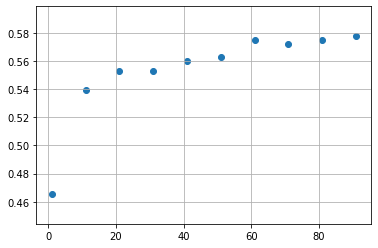

In [78]:
from sklearn.ensemble import RandomForestClassifier
# Plot the correlation between n_estimators and accuracy

# X_train_sample = X_train.head(5000) # this is series
# y_train_sample = y_train[:5000] # this is array

# print (X_train_sample.shape)
# print (y_train_sample.shape)

n = range (1,100,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()
plt.scatter(n, results)

It is shown that with approximately 60 trees, Random Forest classifier starts reaching the highest performance.

In [79]:
tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 60, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.5724270908652688
Confusion matrix:
 [[ 696  253  186    0]
 [ 100 1203  307    0]
 [ 150  769  476    1]
 [   0    6    2    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67      1135
           1       0.54      0.75      0.63      1610
           2       0.49      0.34      0.40      1396
           3       0.00      0.00      0.00         8

    accuracy                           0.57      4149
   macro avg       0.44      0.43      0.42      4149
weighted avg       0.58      0.57      0.56      4149



<h3><b>Adding content of Description into Text</b></h3>

In [80]:
data.head(3)

,_unit_id,gender,description,fav_number,retweet_count,text,tweet_count,Tweets,Description
0,815719226,b'male',i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm
1,815719227,b'male',I'm the author of novels filled with family dr...,68,0,ÛÏIt felt like they were my friends and I was...,7471,"[ûïit, felt, like, friends, living, story, û, ...",i m the author of novels filled with family dr...
3,815719229,b'male',"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,"[hi, jordanspieth, looking, url, use, ifttt, t...",mobile guy ers shazam google kleiner perkins y...


<b>Concatenating 'description' to 'text'</b>

In [81]:
#Fill NaN with empty string
data.fillna("", inplace = True)

# Concatenate text with description, add white space between. 
# By using Series helper functions Series.str()
data['text_description'] = data['text'].str.cat(data['description'], sep=' ')

data['text_description'].isnull().value_counts() # Check if any null values, True if there is at least one.

False    13830
Name: text_description, dtype: int64

<b>Re-create training dataset</b>

In [82]:
# split the dataset in train and test
X = data['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
#In the code line above, stratify will create a train set with the same class balance than the original set

X_train.head()
X_train.isnull().values.any() # Check if any null values, True if there is at least one.

False

<h3><b>Try with Logistic Regression</b></h3>

In [83]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

F:\Users\Shreya Ananya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.6813690045794167
Confusion matrix:
 [[ 958   80   97    0]
 [ 137 1195  278    0]
 [ 189  533  674    0]
 [   0    7    1    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79      1135
           1       0.66      0.74      0.70      1610
           2       0.64      0.48      0.55      1396
           3       0.00      0.00      0.00         8

    accuracy                           0.68      4149
   macro avg       0.51      0.52      0.51      4149
weighted avg       0.68      0.68      0.67      4149



F:\Users\Shreya Ananya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h3><b>Try SVM</b></h3>

In [84]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6854663774403471
Confusion matrix:
 [[ 951   82  102    0]
 [ 117 1169  324    0]
 [ 178  494  724    0]
 [   0    7    1    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80      1135
           1       0.67      0.73      0.70      1610
           2       0.63      0.52      0.57      1396
           3       0.00      0.00      0.00         8

    accuracy                           0.69      4149
   macro avg       0.51      0.52      0.52      4149
weighted avg       0.68      0.69      0.68      4149



F:\Users\Shreya Ananya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<b>Try with Random Forest</b>

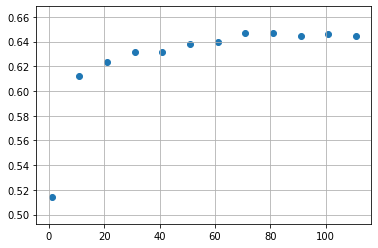

In [85]:
# Plot the correlation between n_estimators and accuracy

# X_train_sample = X_train.head(5000) # this is series
# y_train_sample = y_train[:5000] # this is array

# print (X_train_sample.shape)
# print (y_train_sample.shape)

n = range (1,120,10) #step 10

results = []
for i in n:
    clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = i, random_state=0))])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results.append(accuracy_score(y_test, predictions))
plt.grid()    
plt.scatter(n, results)

It is shown that with approximately 80 trees, Random Forest classifier starts reaching the highest performance.

In [86]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 80, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))
print('Confusion matrix:\n',confusion_matrix(y_test,predictions))
print('Classification report:\n',classification_report(y_test,predictions))

Accuracy: 0.6464208242950108
Confusion matrix:
 [[ 870  159  106    0]
 [ 100 1334  176    0]
 [ 148  770  478    0]
 [   1    6    1    0]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.77      1135
           1       0.59      0.83      0.69      1610
           2       0.63      0.34      0.44      1396
           3       0.00      0.00      0.00         8

    accuracy                           0.65      4149
   macro avg       0.50      0.48      0.48      4149
weighted avg       0.65      0.65      0.63      4149



F:\Users\Shreya Ananya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
